# Newtons Law of Cooling
$$
\frac{dT}{dt}(t) = K[M - T]
$$
where 
where 
T is the temperature of the object at time t, M is the temperature of its surroundings, and K is a constant of proportionality greater than 0. 

A classic example is a hot coffee in a room that is cooler than the temperature of the coffee


In [4]:
import numpy as np
from scipy.optimize import fsolve
from typing import Callable


def Newton_cool(T: float, K: float, M: float) -> float:
    """
    Newton Cooling ODE function that returns the derivative of temperature with respect to time.

    Parameters:
    T (float): Temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.

    Returns:
    float: Derivative of temperature with respect to time.
    """
    return K * (M - T)

def true_sol(T0: float, M: float, K: float, t: float) -> float:
    """
    Exact solution of the Newton's Law of Cooling.

    Parameters:
    T0 (float): Initial temperature of the object.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    t (float): Time.

    Returns:
    float: Temperature at time t.
    """
    return M + (T0 - M) * np.exp(-K * t)

def euler_method(func: Callable, method: str, T0: float, M: float, K: float, TT: float, h: float) -> np.ndarray:
    """
    Generalized Euler method function to approximate the solution of the ODE using either forward or backward Euler method.

    Parameters:
    func (Callable): Function representing the ODE.
    method (str): Euler method type ('forward' or 'backward').
    T0 (float): Initial temperature.
    M (float): Temperature of the surrounding area.
    K (float): Proportionality constant.
    TT (float): Final time for simulation.
    h (float): Time step.

    Returns:
    np.ndarray: Array of approximated temperatures over time.
    """
    if h <= 0:
        raise ValueError("Time step h must be positive")
    
    num_steps = int(TT / h)
    temperatures = np.zeros(num_steps)
    temperatures[0] = T0

    for i in range(1, num_steps):
        if method == 'forward':
            temperatures[i] = temperatures[i - 1] + h * func(temperatures[i - 1], K, M)
        elif method == 'backward':
            f = lambda y: y - temperatures[i - 1] - h * func(y, K, M)
            temperatures[i] = fsolve(f, temperatures[i - 1])  # Using previous temperature as initial guess
        else:
            raise ValueError("Method must be 'forward' or 'backward'")
    
    return temperatures


# Example usage
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 10  # Final time
h = 0.01 # Time step

# Approximating using both methods
approx_temps_backward = euler_method(Newton_cool, 'backward', T0, M, K, TT, h)
approx_temps_forward = euler_method(Newton_cool, 'forward', T0, M, K, TT, h)

# Adams-Bashforth and Adams-Moulton
for order 3 AB - 
$$
x_{n+1} = x_n + \frac{h}{12} (23f(t_i,x(t_i)) - 16f(t_{i-1},x(t_{i-1})) + 5f(t_{i-2},x(t_{i-2})))
$$

for order 3 AM - 
$$
x_{n+1} = x_n + \frac{h}{24} (9f(t_{i+1},x(t_{i+1})) + 19f(t_{i},x(t_{i})) - 5f(t_{i-1},x(t_{i-1})) + f(t_{i-2}, x(t_{i-2})))
$$


In [2]:
from scipy.optimize import fsolve
import numpy as np

def AB3(func, T0, M, K, TT, h):
    '''
    Adams-Bashforth of order 3 method is a linear multistep method using the history points of the ODE to solve the approximation
    '''
    # Initializing the x array to store values of f
    num_steps = int((TT-0)/h)
    x = np.zeros(num_steps)
    x[0] = T0

    for i in range(min(2, num_steps-1)):
        x[i+1] = x[i] + h*func(x[i],K,M)

    for i in range(2, num_steps - 1):
        x[i + 1] = x[i] + h / 12 * (23 * func(x[i], K, M) - 16 * func(x[i - 1], K, M) + 5 * func(x[i - 2], K, M))

    return x


def AM4(func, T0, M, K, TT, h):
    '''
    Adams-Moulton of order 4 solver.
    
    Parameters:
    func: Function representing the differential equation (dy/dt = func(y, K, M))
    T0: Initial value
    M, K: Parameters of the function
    TT: End time
    h: Step size

    Returns:
    Array of values approximating the solution at each step.
    '''
    num_steps = int((TT - 0) / h)
    x = np.zeros(num_steps)
    x[0] = T0

    # Initial steps using a simpler method
    for i in range(min(2, num_steps-1)):
        f = lambda y: y - x[i] - h * func(x[i], K, M)
        x[i+1] = fsolve(f, x[i])

    # Main Adams-Moulton steps
    for i in range(2, num_steps-1):
        f = lambda y: y - x[i] - (h / 24) * (9 * func(y, K, M) + 19 * func(x[i], K, M) - 5 * func(x[i-1], K, M) + func(x[i-2], K, M))
        x[i+1] = fsolve(f, x[i])

    return x

# Our Example
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 10  # Final time
h = 0.01  # Time step

approx_temps_ab = AB3(Newton_cool, T0, M, K, TT, h)
approx_temps_am = AM4(Newton_cool, T0, M, K, TT, h)

# Plotting the results of 
- Eulers method (backward and forward)
- and Adams-Bashforth and Adams-Moulton method

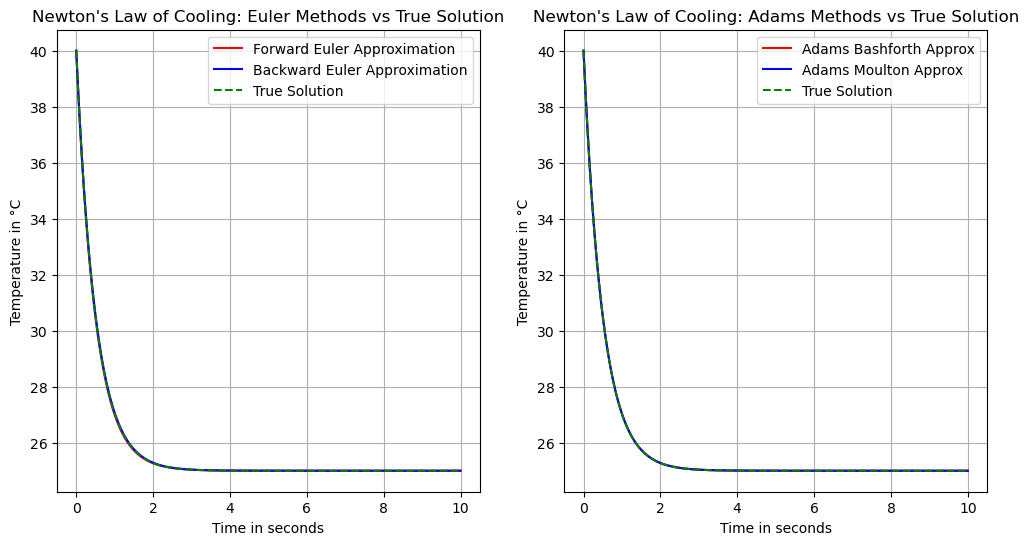

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, TT, len(approx_temps_forward))

# Generate true solution data
true_solution = true_sol(T0, M, K, t)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
ax[0].plot(t, approx_temps_forward, color="red", label='Forward Euler Approximation')
ax[0].plot(t, approx_temps_backward, color='blue', label='Backward Euler Approximation')
ax[0].plot(t, true_solution, color='green', linestyle='dashed', label='True Solution')
ax[0].set_xlabel('Time in seconds')
ax[0].set_ylabel('Temperature in °C')
ax[0].set_title('Newton\'s Law of Cooling: Euler Methods vs True Solution')
ax[0].legend()
ax[0].grid(True)

# Second subplot
ax[1].plot(t, approx_temps_ab, color = "red", label = "Adams Bashforth Approx")
ax[1].plot(t, approx_temps_am, color = "blue", label = "Adams Moulton Approx")
ax[1].plot(t, true_solution, color = "green", linestyle = 'dashed', label = 'True Solution')
ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Temperature in °C')
ax[1].set_title('Newton\'s Law of Cooling: Adams Methods vs True Solution')
ax[1].legend()
ax[1].grid(True)

plt.show()
